## Ejemplo SVM Clasificación no lineal
<div style="border-style:groove;border-width:thin;padding:10px">
En la clase anterior hemos visto un ejemplo de clasificación lineal utilizando SVM. Se usó el método LinearSVC de Scikit-Learn. Hoy vamos a ver como sería una clasificación no lineal, es decir, cuando la frontera o fronteras de decisión entre las clases no son rectas.
    </div>

<div style="border-style:groove;border-width:thin;padding:10px">
Una posible solución es generar nuevos datos de orden superior como hicimos con la regresión, sin embargo, esta solución no es generalizable con datasets grandes o con un grado alto. Por ello vamos a probar una solución más específica.
   </div>

<div style="border-style:groove;border-width:thin;padding:10px">
Debes seguir los siguientes pasos:
    <ol>
        <li>Importa el dataset make_moons que sirve para generar puntos de semicírculos intercalados. Genera X e y con la orden "X,y = make_moons(n_samples=1000,noise =0.3)".</li>
        <li>Pinta los datos con colores distintos para y=0 e y=1 usando scatter</li>
        <li>Modifica los parámetros de make_moons n_samples y noise y analiza el resultado.</li>
        <li>Genera el objeto clasificador de "Support Vectors"  con la orden "SVC(kernel='poly',degree=3,coef0=1,C=5)". kernel=poly indica que la solución va a ser polinomial.</li>
        <li>Genera los conjutos de train y de test y entrena el sistema.</li>
        <li>Saca el classification report y modifica los parámetros del SVC para ver si cambia el resultado. Prueba a poner una solución lineal (kernel='linear'), a cambiar el grado del polinomio y a cambiar el C.</li>
    </ol>
    <p>En este ejercicio hemos utilizado la clase SVC. Tenéis más información aquí:</p>
    <a>https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html</a>
</div>

In [141]:
from sklearn.datasets import make_moons
#1
X,y = make_moons(n_samples=20000,noise=0.3, random_state=42)

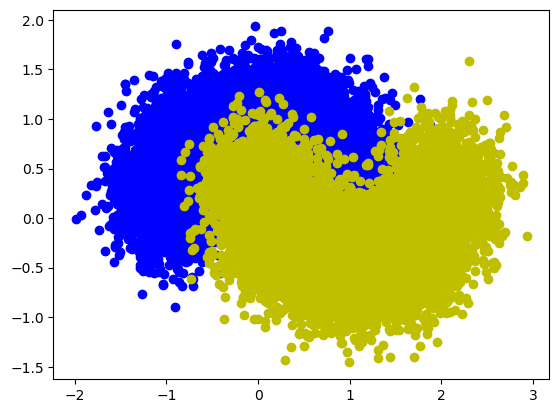

In [142]:
# 2
import numpy as np
ceros = []
unos = []
import matplotlib.pyplot as plt
for i,clase in enumerate(y):
    if clase == 0:
        ceros.append([X[:,0][i],X[:,1][i]])
    else:
        unos.append([X[:,0][i],X[:,1][i]])
ceros = np.array(ceros)
unos = np.array(unos)
plt.scatter(ceros[:,0],ceros[:,1],color='b')
plt.scatter(unos[:,0],unos[:,1],color='y')
plt.show()

In [152]:
# 4) Clasificador SVC polinomial (con escalado)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clasificador = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=2, C=1.0)
)

clasificador = SVC(kernel="rbf", gamma=2, coef0=0.5, C=1.0)

In [150]:
# 5) Train/Test + entrenamiento
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

clasificador.fit(X_train, y_train)
y_pred = clasificador.predict(X_test)


In [153]:
# 6) Classification report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2500
           1       0.92      0.92      0.92      2500

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000

0.916
